In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as copy

In [2]:
NL_c = 0.01
EmitStr = ['7','14','28']
nEmit = len(EmitStr)
Emit  = [float(emit)*1.0e-9/NL_c**2 for emit in EmitStr]
tunex = 0.8538658
_x = 2
_xSTR = 'Y'
q_max = 20.0
k_max = 0.1
dw_dI = -2*np.pi*0.65346402

In [3]:
def GaussDist(x):
    return np.exp(-x**2/2.0)/np.sqrt(2.0*np.pi)
Q = np.linspace(-q_max,q_max,2048)
histData = GaussDist(Q)
dq = Q[1]-Q[0]

# Centroid from tracking

In [4]:
cData=[]
Xi0  =[]
nMax =[]
i=0
for i in range(nEmit):
    cData.append(np.real(np.load(_xSTR+'.mid.emit'+EmitStr[i]+'nm.npy'))) 

0.21902323461800036
0.21904896481736486
0.2188306007719839


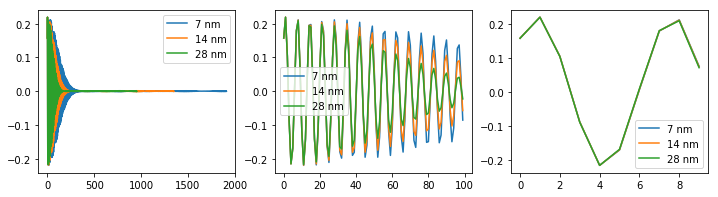

In [5]:
legend = [emit + ' nm' for emit in EmitStr]
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
for i in range(len(Emit)):
    plt.plot(cData[i][:int(16/np.sqrt(Emit[i]))])
plt.legend(legend)
plt.subplot(1,3,2)
for i in range(len(Emit)):
    plt.plot(cData[i][:100])
plt.legend(legend)
plt.subplot(1,3,3)
for i in range(len(Emit)):
    plt.plot(cData[i][:10])
plt.legend(legend)

for i in range(len(Emit)):
    iMax=np.argmax(cData[i][:100])
    Xi0.append(cData[i][iMax])
    print(Xi0[i])
    cData[i]=cData[i][iMax:]/cData[i][iMax]
    cData[i]=cData[i][:int(16/np.sqrt(Emit[i]))]

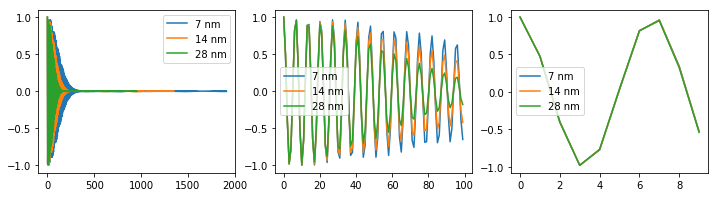

In [6]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
for i in range(len(Emit)):
    plt.plot(cData[i])
plt.legend(legend)
plt.subplot(1,3,2)
for i in range(len(Emit)):
    plt.plot(cData[i][:100])
plt.legend(legend)
plt.subplot(1,3,3)
for i in range(len(Emit)):
    plt.plot(cData[i][:10])
plt.legend(legend)

# Compare cData Time Domain

### as it is

In [7]:
cDataModel = [0]*nEmit
for i in range(nEmit):
    T = len(cData[i])
    cDataModel[i]=np.zeros(T,dtype=np.complex)
    for t in range(T):
        cDataModel[i][t] = np.sum(histData*np.exp(-1j*t*Emit[i]**0.5*Q*Xi0[i]*dw_dI)*dq)*np.exp(-2j*np.pi*tunex*t)    
    cDataModel[i] = cDataModel[i]/cDataModel[i][0]

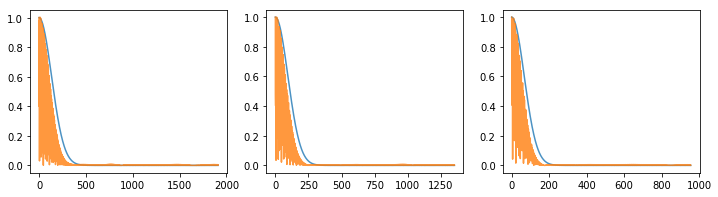

In [8]:
plt.figure(figsize=(nEmit*4,3))
for i in range(nEmit):
    plt.subplot(1,nEmit,i+1)
    plt.plot(np.abs(cDataModel[i]),alpha=0.8)
    plt.plot(np.abs(cData[i]),     alpha=0.8)

### artificial fitting <--- 1.2 factor

In [9]:
cDataModel = [0]*nEmit
for i in range(nEmit):
    T = len(cData[i])
    cDataModel[i]=np.zeros(T,dtype=np.complex)
    for t in range(T):
        cDataModel[i][t] = np.sum(histData*np.exp(-1.2j*t*Emit[i]**0.5*Q*Xi0[i]*dw_dI)*dq)*np.exp(-2j*np.pi*tunex*t)    
    cDataModel[i] = cDataModel[i]/cDataModel[i][0]

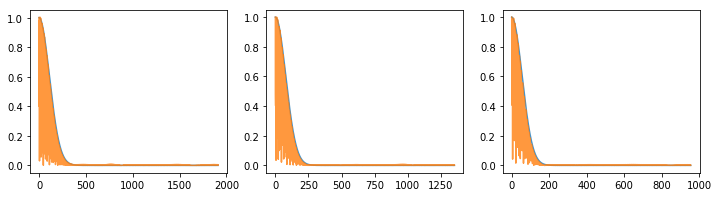

In [10]:
plt.figure(figsize=(nEmit*4,3))
for i in range(nEmit):
    plt.subplot(1,nEmit,i+1)
    plt.plot(np.abs(cDataModel[i]),alpha=0.8)
    plt.plot(np.abs(cData[i]),     alpha=0.8)

# Compare cData Freq Domain

In [11]:
nSample = 2048
K = np.linspace(-k_max,k_max,nSample)
Tune = [0]*len(Emit)
Amp  = [0]*len(Emit)
for i in range(len(Emit)):
    T = len(cData[i])
    Amp[i] = np.zeros(nSample,dtype=np.complex)
    Tune[i] = tunex + K
    for k in range(nSample):
        Amp[i][k] = np.sum(cData[i]*np.exp(2j*np.pi*Tune[i][k]*np.arange(0,T)))
    Amp[i] = Amp[i]*Emit[i]**0.5*2

In [12]:
Q = Q
histData = histData*np.pi/np.abs(Xi0[0]*dw_dI)

### as it is 

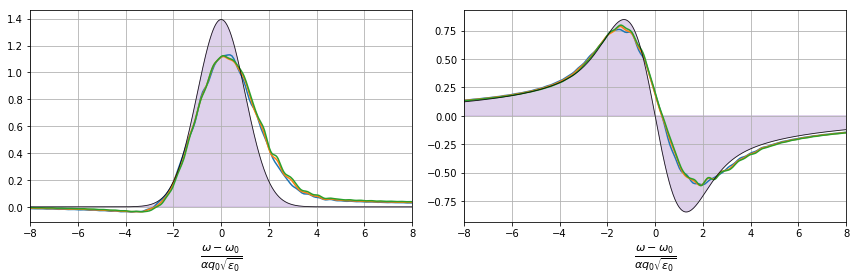

In [13]:
from scipy.signal import hilbert
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot(2*np.pi*K/(Emit[i]**0.5*Xi0[i]*dw_dI),np.real(Amp[i]))
plt.plot(Q,histData,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(Q, 0, histData,color='C4',alpha=0.3)
plt.xlim(-8.0,8.0)
plt.xlabel(r'$\frac{\omega-\omega_0}{\alpha q_0 \sqrt{\epsilon_0}}$',fontsize=16);
plt.grid()

hilbertData = -np.imag(hilbert(histData))
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot(2*np.pi*K/(Emit[i]**0.5*Xi0[i]*dw_dI),np.imag(Amp[i]))
plt.plot(Q,hilbertData,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(Q, 0, hilbertData,color='C4',alpha=0.3)
plt.xlabel(r'$\frac{\omega-\omega_0}{\alpha q_0 \sqrt{\epsilon_0}}$',fontsize=16);
plt.xlim(-8.0,8.0)
plt.grid()
plt.tight_layout()

### artificial fitting <--- 1.2 factor on amplitude, 0.17 rad on phase

In [14]:
nSample = 2048
K = np.linspace(-k_max,k_max,nSample)
Tune = [0]*len(Emit)
Amp  = [0]*len(Emit)
for i in range(len(Emit)):
    T = len(cData[i])
    Amp[i] = np.zeros(nSample,dtype=np.complex)
    Tune[i] = tunex + K
    for k in range(nSample):
        Amp[i][k] = np.sum(cData[i]*np.exp(2j*np.pi*Tune[i][k]*np.arange(0,T)-1j*0.17))
    Amp[i] = Amp[i]*Emit[i]**0.5*2

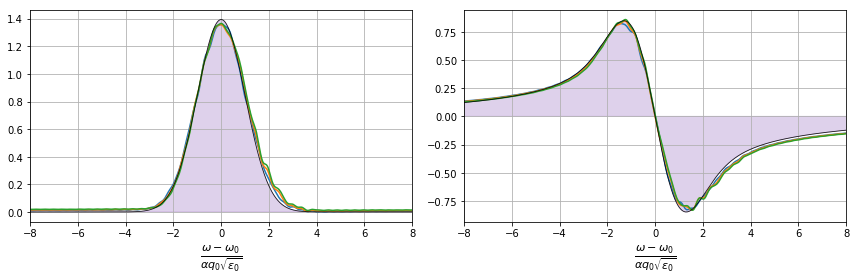

In [15]:
from scipy.signal import hilbert
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot(2*np.pi*K/(Emit[i]**0.5*Xi0[i]*dw_dI)/1.2,np.real(Amp[i])*1.2)
plt.plot(Q,histData,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(Q, 0, histData,color='C4',alpha=0.3)
plt.xlim(-8.0,8.0)
plt.xlabel(r'$\frac{\omega-\omega_0}{\alpha q_0 \sqrt{\epsilon_0}}$',fontsize=16);
plt.grid()

hilbertData = -np.imag(hilbert(histData))
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot(2*np.pi*K/(Emit[i]**0.5*Xi0[i]*dw_dI)/1.2,np.imag(Amp[i])*1.2)
plt.plot(Q,hilbertData,color='k',alpha=0.9,linewidth=0.8)
plt.fill_between(Q, 0, hilbertData,color='C4',alpha=0.3)
plt.xlabel(r'$\frac{\omega-\omega_0}{\alpha q_0 \sqrt{\epsilon_0}}$',fontsize=16);
plt.xlim(-8.0,8.0)
plt.grid()
plt.tight_layout()